In [ ]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [ ]:
import cv2 as cv
from torchvision.transforms import functional as F
model_fasterrcnn_resnet50 = fasterrcnn_resnet50_fpn(pretrained=True)
model_fasterrcnn_resnet50.eval()

# Print the model to understand its structure
print(model_fasterrcnn_resnet50)

# Identify the layers you want to visualize
hook_layers = [model_fasterrcnn_resnet50.backbone.body.layer1[0].conv1,
               model_fasterrcnn_resnet50.backbone.body.layer2[0].conv1,
               model_fasterrcnn_resnet50.backbone.body.layer3[0].conv1]

feature_maps = []

def hook_fn(module, input, output):
    feature_maps.append(output)

hooks = [layer.register_forward_hook(hook_fn) for layer in hook_layers]

# Assuming your input image has shape (batch_size, channels, height, width)

input_image = cv.imread("/content/000000000139.jpg")
input_image = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)  # Convert to RGB
input_image = F.to_tensor(input_image).unsqueeze(0)  # Convert to tensor and add batch dimension
input_image = Variable(input_image)

# Forward pass
model_fasterrcnn_resnet50(input_image)

# Unregister hooks
for hook in hooks:
    hook.remove()

# Visualize feature maps
for i, feature_map in enumerate(feature_maps):
    plt.figure(figsize=(12, 4))
    plt.title(f"Feature Map {i + 1}")
    for j in range(feature_map.size(1)):
        plt.subplot(1, feature_map.size(1), j + 1)
        plt.imshow(feature_map[0, j].detach().numpy(), cmap='viridis')
        plt.axis('off')
    plt.show()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

<ipython-input-4-6645b6764809>:40: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, feature_map.size(1), j + 1)


(200, 304)
(200, 304)
(100, 152)


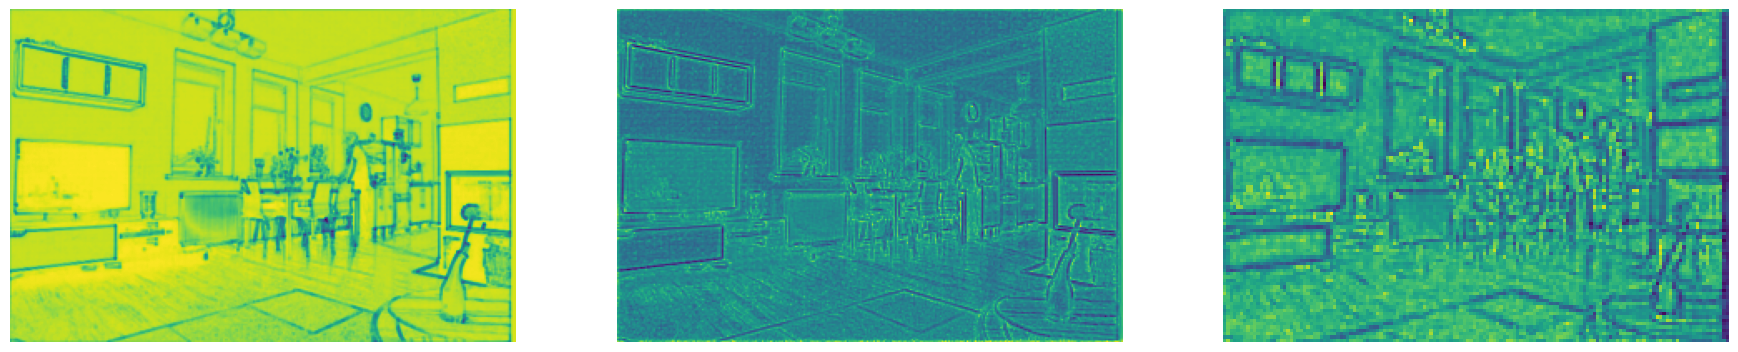

In [ ]:
processed = []
for feature_map in feature_maps:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(5, 4, i+1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
plt.savefig(str('feature_maps.jpg'), bbox_inches='tight')